# Capstone Project Title: European Bank’s Customer Satisfaction Analysis & Churn Prediction

## Name: Sathiswaran Sangaran 



## 1. Introduction 
### Problem Statement: 
Customer churn is a critical issue for businesses in competitive markets. Understanding and predicting churn can help companies strategize proactive measures on customer retention, improve customer satisfaction, and increase revenue while acquiring new customers. The aim is to predict customer churn (whether a customer will exit the bank or not). This is a binary classification problem where the target variable is Exited.

## 2. Executive Summary
### 2.1 Goals: 
•	Analyse customer data from bank to identify patterns and trends that can help in improving  customer retention and satisfaction.

•	Develop models to predict customer churn using various customer attributes.

•	Provide actionable insights for bank management and marketing teams

•	Bank to make informed data driven decisions to enhance their services, reduce customer churn rates by understanding the factors that influence the customer behaviour. 
Customer churn is a critical issue for businesses in a competitive markets


### 2.2 Audience :

This analysis is valuable for bank management and marketing teams. Understanding churn can help in devising strategies to retain customers, thereby increasing profitability.

### 2.3 Success Metric :

The primary success metric will be Accuracy. 

Additionally, we'll evaluate Precision, Recall, F1 score and AUC (Area Under the ROC Curve) to get a comprehensive view of model performance.

### 2.4 Data Overview :
•	Data Types: Both numerical (e.g., CreditScore, Age, Balance) and categorical (e.g., Geography, Gender).

•	Distributions: We'll visualize these distributions to understand data spread and identify potential outliers.

•	Missing Data: Identify and address any missing data.

Now we import necessary libraries and load the data.

## 3.Data Understanding

### 3.1 Import Libraries and Load Data

In [1]:
#Importing all libraries that may be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### 3.2 Data Description:

In [2]:
df = pd.read_csv(r'churn_data1.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1288,15565701,Ferri,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
1,4199,15565706,Akobundu,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
2,7091,15565714,Cattaneo,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
3,2021,15565779,Kent,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
4,3698,15565796,Docherty,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0


In [3]:
# Describing the datatypes of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        18869 non-null  int64  
 1   CustomerId       18869 non-null  int64  
 2   Surname          18869 non-null  object 
 3   CreditScore      18869 non-null  int64  
 4   Geography        18803 non-null  object 
 5   Gender           18862 non-null  object 
 6   Age              18869 non-null  int64  
 7   Tenure           18869 non-null  int64  
 8   Balance          18869 non-null  float64
 9   NumOfProducts    18869 non-null  int64  
 10  HasCrCard        18869 non-null  int64  
 11  IsActiveMember   18869 non-null  int64  
 12  EstimatedSalary  18869 non-null  float64
 13  Exited           18869 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.0+ MB


In [4]:
#descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,18869.000000,1.886900e+04,18869.000000,18869.000000,18869.000000,18869.000000,18869.000000,18869.000000,18869.000000,18869.000000,18869.000000
mean,5257.557740,1.579664e+07,614.885315,41.252266,5.012825,99217.795743,1.990143,0.606762,0.511156,93166.756734,0.341407
std,2770.088138,1.300626e+05,135.472634,13.145670,3.018694,71210.990342,1.004605,0.488482,0.499889,49653.162007,0.474194
min,1.000000,1.556570e+07,300.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2894.000000,1.568362e+07,525.000000,31.000000,2.000000,31044.000000,1.000000,0.000000,0.000000,52233.000000,0.000000
50%,5292.000000,1.580140e+07,629.000000,39.000000,5.000000,106171.680000,2.000000,1.000000,1.000000,91755.000000,0.000000
75%,7657.000000,1.590929e+07,716.000000,50.000000,8.000000,147435.960000,3.000000,1.000000,1.000000,131010.000000,1.000000
max,10000.000000,1.601569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## 4.Data Cleaning & Preparation

### 4.1 Handling Missing Data:

In [5]:
#checking the missing values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography          66
Gender              7
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [6]:
# Filling missing values in 'Geography' with the mode
geography_mode = df['Geography'].mode()[0]
df['Geography'].fillna(geography_mode, inplace=True)

In [7]:
# Filling missing values in 'Gender' with the mode
gender_mode = df['Gender'].mode()[0]
df['Gender'].fillna(gender_mode, inplace=True)

### 4.2 Handling Missing Data:

In [8]:
# Verified that there are no missing values left
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### Reason for Encoding Categorical Features:

Categorical data represents discrete categories or groups that are often non-numeric, such as 'Geography' (e.g., France, Germany, Spain) or 'Gender' (e.g., Male, Female). Most machine learning algorithms require numerical input to perform mathematical calculations during the training process. Therefore, converting categorical data into numerical format is essential. This process is called encoding. There are two main types of encoding methods used:

##### Label Encoding: 
This assigns a unique integer to each category. For instance, 'Male' is encoded as 0 and 'Female' as 1. This is useful for binary categorical variables where the order of categories does not matter.

##### One-Hot Encoding: 
This creates binary columns for each category, which can then have a value of 0 or 1. For instance, the 'Geography' column with categories 'France', 'Germany', and 'Spain' will be transformed into three columns: 'Geography_France', 'Geography_Germany', and 'Geography_Spain'. This method prevents the model from interpreting any ordinal relationship between categories.

Why Encoding is Important:

Compatibility with Algorithms: Most machine learning algorithms, including logistic regression, random forests, and gradient boosting, require input features to be numerical. Encoding categorical features ensures compatibility with these algorithms.

Performance Improvement: Proper encoding of categorical features can significantly improve the performance and accuracy of the model. It ensures that the model can effectively learn and differentiate between different categories.

Facilitates Analysis: Encoding categorical features into numerical values facilitates easier analysis and visualization of the data, as numerical data can be readily used in statistical and graphical tools.

By encoding categorical features, we ensure that the data is in a format that is suitable for machine learning models, enabling them to learn patterns and relationships more effectively and accurately.

### 4.3 Encoding Categorical Features:

#### Label Encoding for binary categorical features (Gender)

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for binary categorical features
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [10]:
# One-hot encoding for multi-class categorical features (Germany, Spain, France)
df = pd.get_dummies(df, columns=['Geography'])

In [11]:
df['Exited'].value_counts()
#Dataset is imbalanced, hence we have to perform SMOTE and check the performances of the model.

Exited
0    12427
1     6442
Name: count, dtype: int64

In [12]:
# Convert to percentage format
df['Exited'].value_counts(normalize=True) * 100

Exited
0    65.859346
1    34.140654
Name: proportion, dtype: float64

## 5.Exploratory Data Analysis (EDA)

In [13]:
# Create a new df that drops RowNumber, CustomerId, Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [14]:
categorical_vars = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']
continuous_vars =  ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

#### Continuous Variable

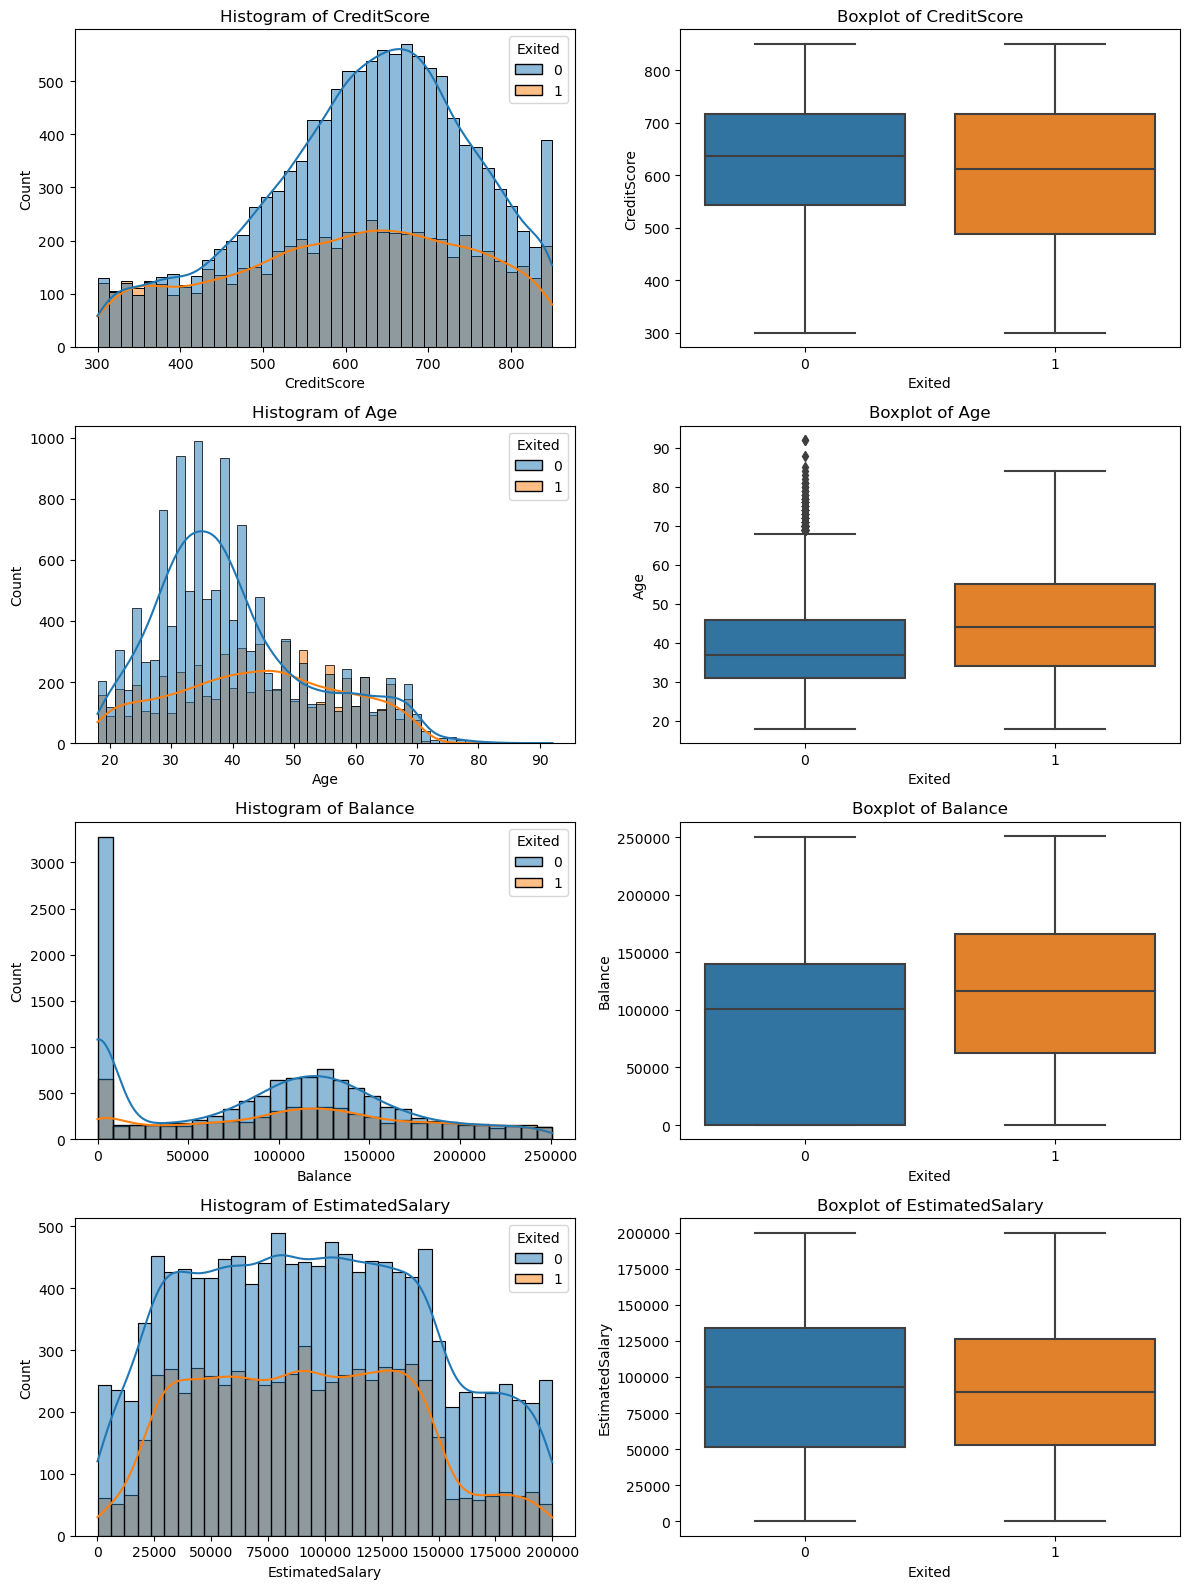

In [15]:
# Setting up the figure with subplots to check the distribution of the continuous variables with respect to the target variable
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(12, len(continuous_vars) * 4))

for i, var in enumerate(continuous_vars):
    # Histogram
    sns.histplot(data=df, x=var, hue='Exited', ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Boxplot
    sns.boxplot(data=df, x='Exited', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

In [16]:
# Credit Score
median_credit_score_exited = df[df['Exited'] == 1]['CreditScore'].median()
median_credit_score_not_exited = df[df['Exited'] == 0]['CreditScore'].median()
print(f"Credit Score: Median credit score for customers who exited: {median_credit_score_exited} (compared to {median_credit_score_not_exited} for those who did not exit)")

# Age
mean_age_exited = df[df['Exited'] == 1]['Age'].mean()
mean_age_not_exited = df[df['Exited'] == 0]['Age'].mean()
print(f"Age: Mean age of customers who exited: {mean_age_exited:.2f} years (compared to {mean_age_not_exited:.2f} years for those who did not exit)")

# Balance
range_balance_exited = f"$0 to ${df[df['Exited'] == 1]['Balance'].max()}"
median_balance_exited = df[df['Exited'] == 1]['Balance'].median()
print(f"Balance: Range of balance for customers who exited: {range_balance_exited} (with a median balance of ${median_balance_exited})")

# Estimated Salary
std_dev_salary = df['EstimatedSalary'].std()
print(f"Estimated Salary: Standard deviation of estimated salaries: ${std_dev_salary:.2f} (indicating variability in income levels)")

Credit Score: Median credit score for customers who exited: 611.0 (compared to 637.0 for those who did not exit)
Age: Mean age of customers who exited: 44.14 years (compared to 39.75 years for those who did not exit)
Balance: Range of balance for customers who exited: $0 to $250898.09 (with a median balance of $116760.6)
Estimated Salary: Standard deviation of estimated salaries: $49653.16 (indicating variability in income levels)


Insights from Continuous Variables:

Central Tendency:

Mean: Average value of a variable.

Median: Middle value that separates the higher half from the lower half of the data.

Mode: Most frequently occurring value in the dataset.

Graphs:

Histograms: Show the frequency distribution of a continuous variable.

Boxplots: Display the distribution of a variable and identify outliers.

Credit Score: Slightly lower median for exited customers. Median credit score for customers who exited: 611.0 compared to 637.0 for those who did not exit.

Age: Older customers are more likely to exit. Mean age of customers who exited is 44.14 years compared to 39.75 years for those who did not exit.

Balance: Higher median balance for exited customers. Range of balance for customers who exited: $0 to $250,898.09 with a median balance of $116,760.6

Estimated Salary: Similar distributions, suggesting it might not be a significant factor for churn.

#### Categorical Variable

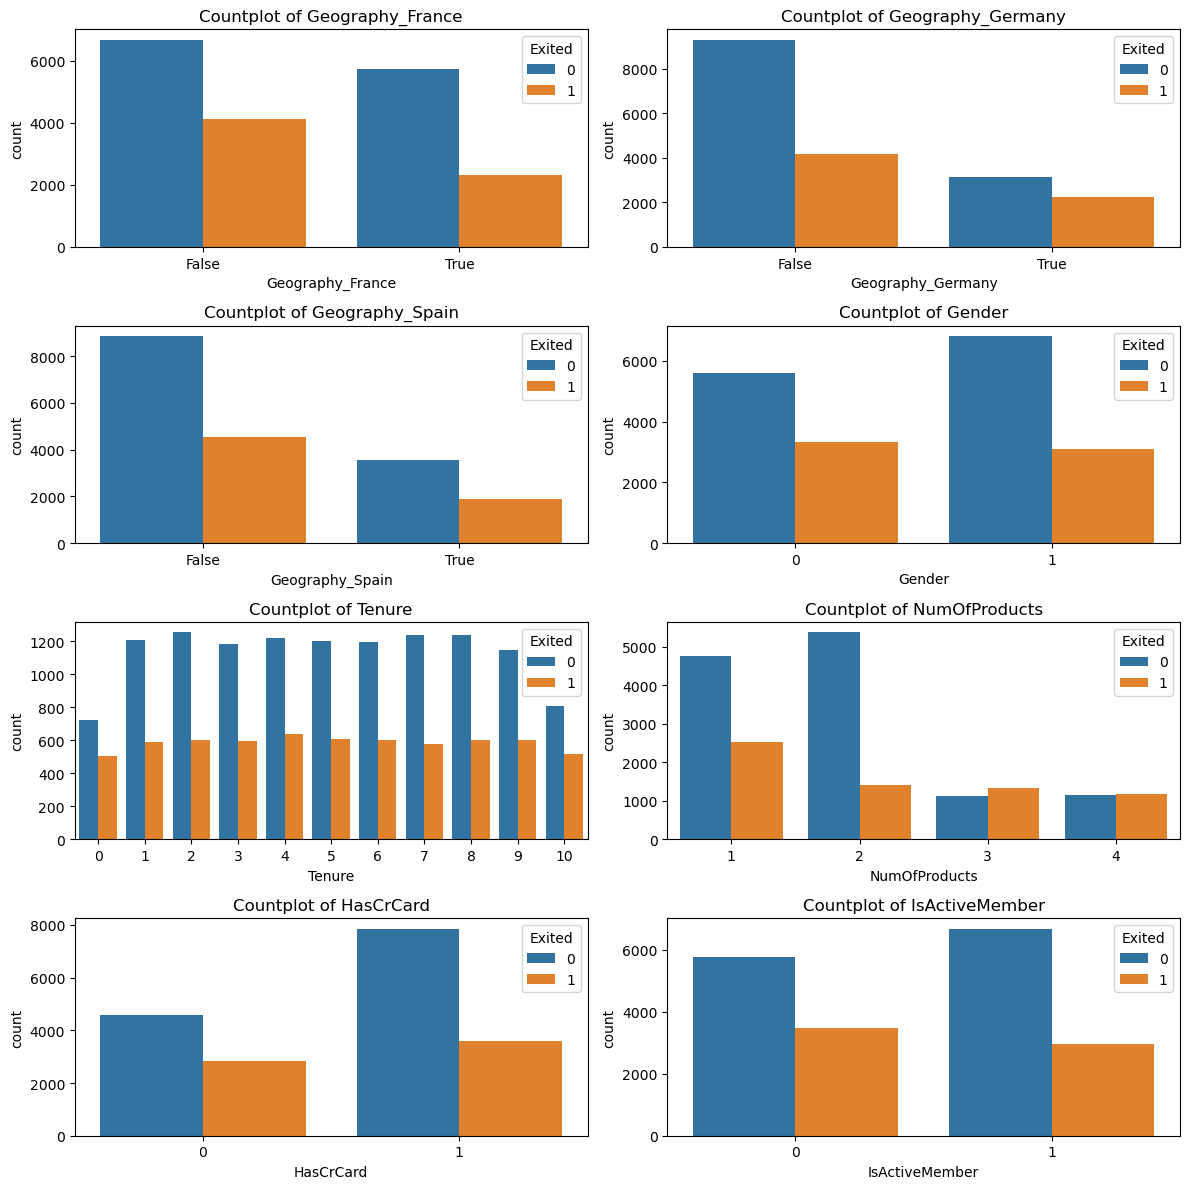

In [17]:
# Set up the figure with subplots for categorical variables with respect to the target column
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

categorical_var1 = ['Geography_France','Geography_Germany','Geography_Spain','Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']

for i, var in enumerate(categorical_var1):
    row, col = divmod(i, 2)  # Determine the row and column position
    sns.countplot(data=df, x=var, hue='Exited', ax=axes[row, col])
    axes[row, col].set_title(f'Countplot of {var}')

plt.tight_layout()
plt.show()

#### Insights from Categorical Variables:

Geography: Higher exits in Germany, lower in France. We can compare this percentage with the overall exit rate to understand if customers from Germany are more likely to exit.

Gender: Higher exit proportion for females.

Tenure and Number of Products: No strong trend with tenure; higher exits with only one product.

Has Credit Card: No significant difference.

Is Active Member: Lower exits for active members.

In [18]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,698,0,39,9,161993.89,1,0,0,90212.38,0,False,False,True
1,612,1,35,1,0.00,1,1,1,83256.26,1,False,False,True
2,601,1,47,1,64430.06,2,0,1,96517.97,0,True,False,False
3,627,0,30,6,57809.32,1,1,0,188258.49,0,False,True,False
4,745,1,48,10,96048.55,1,1,0,74510.65,0,False,True,False


In [19]:
#data type conversion
df= df.astype('int')

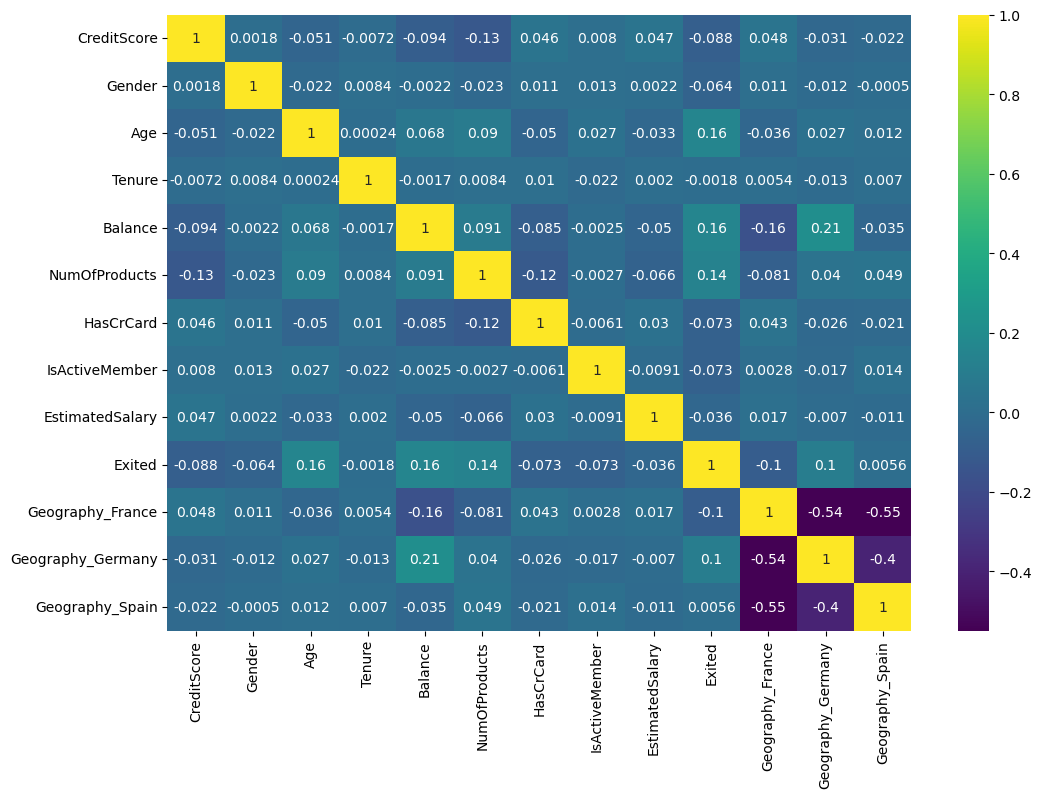

In [20]:
#checking multicollinearity
plt.figure(figsize=(12, 8))  # Setting the figure size
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

### 6. Modelling

### Target Variable and Model Selection

#### Target Variable: 
Exited is a binary target variable indicating whether a customer exited or not.
    
#### Model Type: 
We will need to develop a classification model as our target variable is binary.
    
#### Evaluation Metrics:
    
Accuracy: Overall correctness of the model.
    
Precision and Recall: To understand the performance on the positive class.
    
AUC (Area Under the ROC Curve): To evaluate the model's ability to distinguish between the classes.

### 6.1 Feature Scaling and Addressing Class Imbalance:

In [21]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Feature Scaling
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Addressing Class Imbalance using SMOTE
X = df.drop('Exited', axis=1)
y = df['Exited']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

### 6.2 Splitting Data for Training and Testing:

In [24]:
#Model Building and Evaluation
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


### 6.3 Initial Model Training and Evaluation:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [26]:
# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

In [27]:
# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

log_reg_scores = [
    ["Logistic Regression", 
     accuracy_score(y_test, y_pred_log_reg), 
     precision_score(y_test, y_pred_log_reg), 
     recall_score(y_test, y_pred_log_reg), 
     roc_auc_score(y_test, y_pred_log_reg)]
]

In [28]:
# Train and evaluate Random Forest

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

rf_scores = [
    ["Random Forest", 
     accuracy_score(y_test, y_pred_rf), 
     precision_score(y_test, y_pred_rf), 
     recall_score(y_test, y_pred_rf), 
     roc_auc_score(y_test, y_pred_rf)]
]

In [29]:
# Train and evaluate Gradient Boosting

gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

gb_scores = [
    ["Gradient Boosting", 
     accuracy_score(y_test, y_pred_gb), 
     precision_score(y_test, y_pred_gb), 
     recall_score(y_test, y_pred_gb), 
     roc_auc_score(y_test, y_pred_gb)]
]

In [30]:
# Comparing performance of all models
from tabulate import tabulate

# Combine scores into a table
table = tabulate(log_reg_scores + rf_scores + gb_scores, 
                 headers=["Model", "Accuracy", "Precision", "Recall", "ROC AUC"],
                 tablefmt="pretty")

# Print the table
print(table)

+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      ROC AUC       |
+---------------------+--------------------+--------------------+--------------------+--------------------+
| Logistic Regression | 0.6469523234761617 | 0.6439983613273249 | 0.6395443449959316 | 0.6468712572572177 |
|    Random Forest    | 0.7843492255079461 | 0.7503612716763006 | 0.8449959316517494 | 0.7850128882293765 |
|  Gradient Boosting  | 0.7453228726614364 | 0.7167272727272728 | 0.8018714401952807 | 0.7459416890590409 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


#### 6.4 Tuning the models further to cross compare and evaluate their performances. (Hyperparameter Tuning)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

#Initializing models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}


In [32]:
# Dictionary to store model performance
model_performance = {}

In [33]:
# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    performance = {
        'Accuracy': accuracy_score(y_test, y_pred),
        
        'Precision': precision_score(y_test, y_pred),
        
        'Recall': recall_score(y_test, y_pred),
        
        'AUC': roc_auc_score(y_test, y_prob)
    }
    
    model_performance[model_name] = performance
    print(f"{model_name} Performance: {performance}")

Logistic Regression Performance: {'Accuracy': 0.6469523234761617, 'Precision': 0.6439983613273249, 'Recall': 0.6395443449959316, 'AUC': 0.6940472601868171}
Random Forest Performance: {'Accuracy': 0.7789177227921947, 'Precision': 0.7422459893048128, 'Recall': 0.8470301057770545, 'AUC': 0.8739412661968989}
Gradient Boosting Performance: {'Accuracy': 0.7453228726614364, 'Precision': 0.7167272727272728, 'Recall': 0.8018714401952807, 'AUC': 0.8401979357463241}


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Performance: {'Accuracy': 0.6867833433916717, 'Precision': 0.6748156771439658, 'Recall': 0.7074857607811229, 'AUC': 0.7581148410689152}
K-Nearest Neighbors Performance: {'Accuracy': 0.7388855361094347, 'Precision': 0.7062588904694168, 'Recall': 0.8079739625711961, 'AUC': 0.8085049686301695}


In [34]:
# Convert model_performance to a list of dictionaries
performance_list = list(model_performance.values())

# Using tabulate to create a table
table = tabulate(performance_list, headers="keys", tablefmt="pretty")

# Print the table
print("\nModel Performance:")
print(table)


Model Performance:
+--------------------+--------------------+--------------------+--------------------+
|      Accuracy      |     Precision      |       Recall       |        AUC         |
+--------------------+--------------------+--------------------+--------------------+
| 0.6469523234761617 | 0.6439983613273249 | 0.6395443449959316 | 0.6940472601868171 |
| 0.7789177227921947 | 0.7422459893048128 | 0.8470301057770545 | 0.8739412661968989 |
| 0.7453228726614364 | 0.7167272727272728 | 0.8018714401952807 | 0.8401979357463241 |
| 0.6867833433916717 | 0.6748156771439658 | 0.7074857607811229 | 0.7581148410689152 |
| 0.7388855361094347 | 0.7062588904694168 | 0.8079739625711961 | 0.8085049686301695 |
+--------------------+--------------------+--------------------+--------------------+


### 7. Evaluation

#### 7.1 Evaluating the best model

#### 7.2 Comparing & Plotting performances of all models

In [35]:
# Specify the model names and performances to include in the DataFrame
model_names = list(model_performance.keys())
performances = list(model_performance.values())

# Creating a DataFrame for model performances
performance_df = pd.DataFrame(performances, index=model_names)

# Displaying the DataFrame
print("\nModel Performance:")
print(performance_df)


Model Performance:
                     Accuracy  Precision    Recall       AUC
Logistic Regression  0.646952   0.643998  0.639544  0.694047
Random Forest        0.778918   0.742246  0.847030  0.873941
Gradient Boosting    0.745323   0.716727  0.801871  0.840198
AdaBoost             0.686783   0.674816  0.707486  0.758115
K-Nearest Neighbors  0.738886   0.706259  0.807974  0.808505


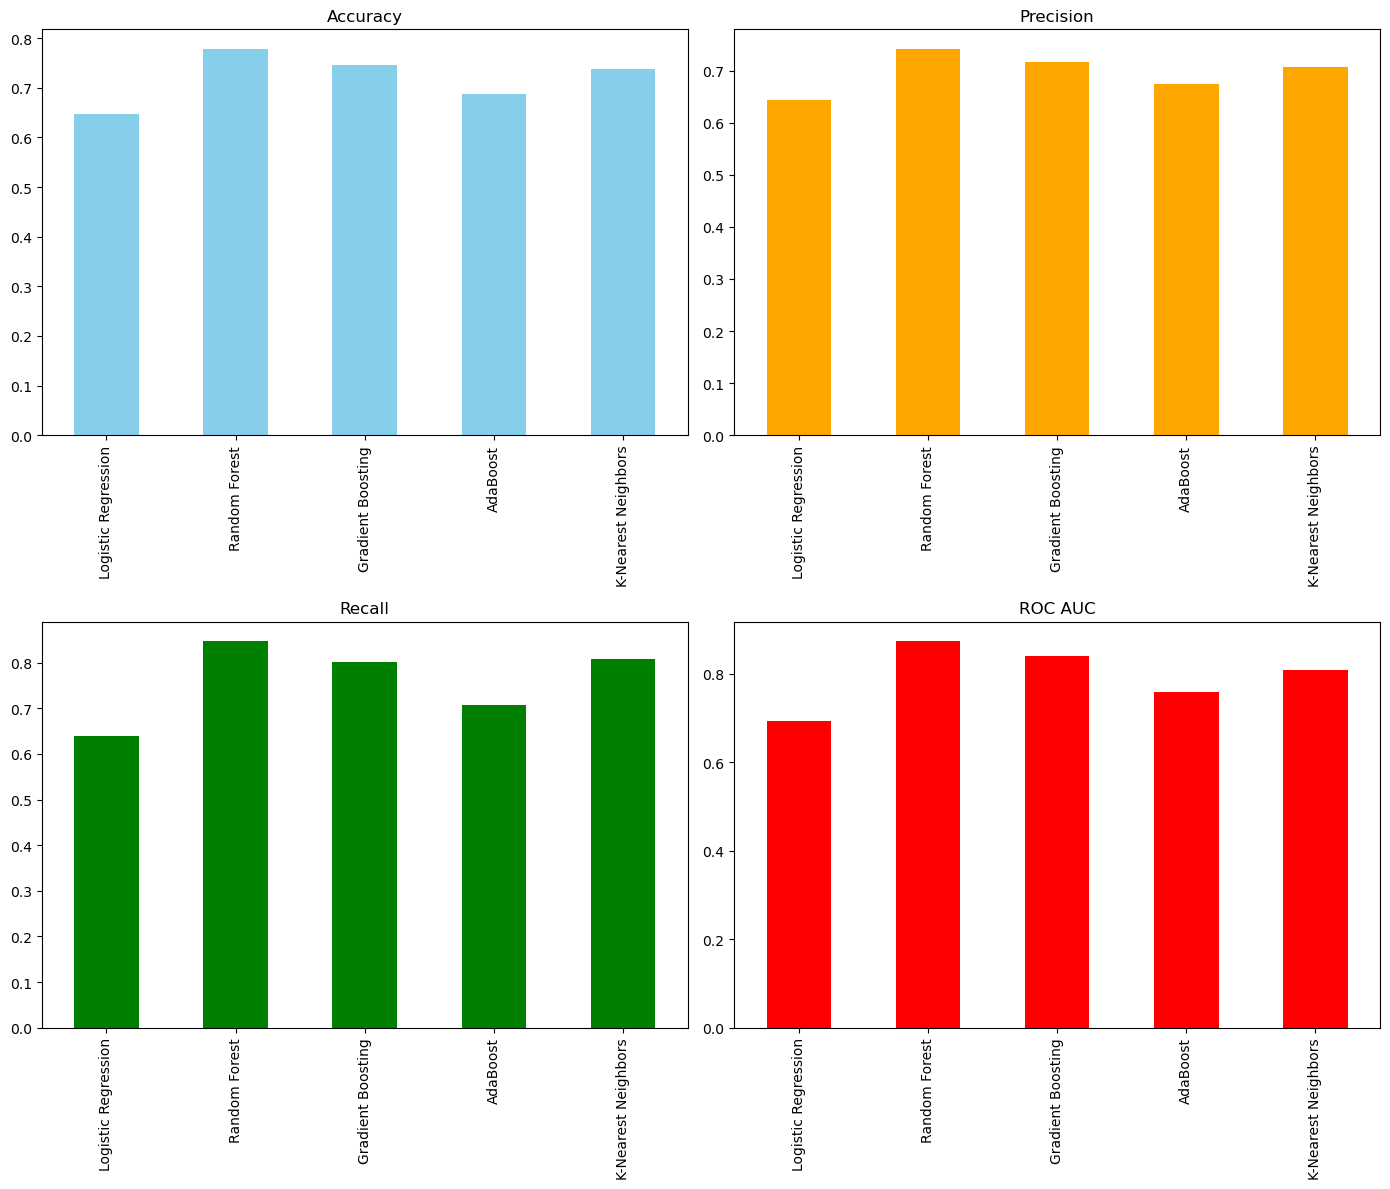

In [36]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plotting Accuracy
performance_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy')

# Plotting Precision
performance_df['Precision'].plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Precision')

# Plotting Recall
performance_df['Recall'].plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Recall')

# Plotting AUC (ROC AUC)
performance_df['AUC'].plot(kind='bar', ax=axes[1, 1], color='red')
axes[1, 1].set_title('ROC AUC')

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()

### 8. Conclusion

From the comparison, we can observe how different models perform across various metrics.

Random Forest and Gradient Boosting are performing better compared to other models. These ensemble models reduce the effect of overfitting and showcase the best performance in accordance to accuracy score and evaluation metrics.

Hence, Random Forest provides robust performance and should be considered to predict customer churn behaviours. 

AUC also helps in evaluating the model as it balances the trade-off between true positive rate and false positive rate.

### Summary Interpretation:

#### Accuracy: 
Accuracy gives an overall view of correct predictions. Random Forest achieves the highest Accuracy (77.5%), followed closely by Gradient Boosting (74.3%) and KNN (72.8%), indicating their ability to correctly classify instances.

#### Precision: 
Precision indicates how reliable positive predictions are. Random Forest has the highest Precision (74.0%), meaning it identifies positives with the highest reliability. KNN and Gradient Boosting also perform well in Precision.

#### Recall: 
Recall shows how well the model captures positive instances.Random Forest (84.1%) and KNN (80.5%) excel in Recall, showing their ability to capture true positives effectively. Gradient Boosting follows closely with 80.4%.

#### AUC: 
AUC assesses the model's ability to distinguish between classes.Random Forest leads in AUC (0.872), indicating superior discrimination ability between positive and negative classes. Gradient Boosting (0.837) and KNN (0.803) also demonstrate good discrimination.

#### Conclusion:

Random Forest emerges as the top performer across all metrics, demonstrating high Accuracy, Precision, Recall, and AUC. It is particularly strong in correctly classifying instances and distinguishing between classes.

Gradient Boosting and KNN also perform well, showing competitive metrics across the board, making them viable alternatives depending on specific needs such as interpretability (Gradient Boosting) or instance-based learning (KNN).

Logistic Regression and AdaBoost show moderate performance compared to the ensemble methods, with AdaBoost slightly outperforming Logistic Regression.

#### Key Findings:
##### Customer Demographics: 
Customers with higher credit scores and older age groups tend to stay with the bank.
##### Account Features: 
Customers with a high balance and fewer products are less likely to churn.
##### Customer Activity: 
Active members are less likely to churn.

#### Actionable Insights:
###### Retention Programs: 
Target high-balance customers and those with a single product for personalized retention strategies.
##### Credit Score Improvement: 
Implement programs to help customers improve their credit scores.
##### Customer Engagement: 
Increase engagement with non-active members to reduce churn.

#### Recommendation & Future Work:
##### Model Improvement: 
mplement more advanced models like XGBoost and deep learning techniques to improve predictions.
##### Feature Engineering: 
Explore additional features that could provide more predictive power.
##### Long-term Strategy: 
Develop a long-term customer retention strategy based on continuous feedback and evolving customer data.